In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#reading the file
df = pd.read_csv('SampleSuperstore.csv')
df.head() #printing the first five rows 

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [3]:
#shape of the data
df.shape

(9994, 13)

In [4]:
#checking for nun values
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [5]:
#datatypes of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [6]:
#creating a function to show unique values of the dataset
def get_unique_values(df):
    for cols in df.columns:
        if df[cols].nunique()< 15:
            print('-' * 30)
            print(cols)
            print('-'* 30)
            print(df[cols].unique())
            print(df[cols].value_counts().to_frame())
        

In [7]:
df_object = df.select_dtypes(include = 'object')
get_unique_values(df_object)

------------------------------
Ship Mode
------------------------------
['Second Class' 'Standard Class' 'First Class' 'Same Day']
                count
Ship Mode            
Standard Class   5968
Second Class     1945
First Class      1538
Same Day          543
------------------------------
Segment
------------------------------
['Consumer' 'Corporate' 'Home Office']
             count
Segment           
Consumer      5191
Corporate     3020
Home Office   1783
------------------------------
Country
------------------------------
['United States']
               count
Country             
United States   9994
------------------------------
Region
------------------------------
['South' 'West' 'Central' 'East']
         count
Region        
West      3203
East      2848
Central   2323
South     1620
------------------------------
Category
------------------------------
['Furniture' 'Office Supplies' 'Technology']
                 count
Category              
Office Supplies   6026
Furn

## The region with the Highest Purchasing power
<p> it will be nice for us to get a look at the region with more sales power and the region with the least </p>

In [8]:
results = df.groupby('Region')['Sales'].sum().reset_index().sort_values(by='Sales', ascending = True)

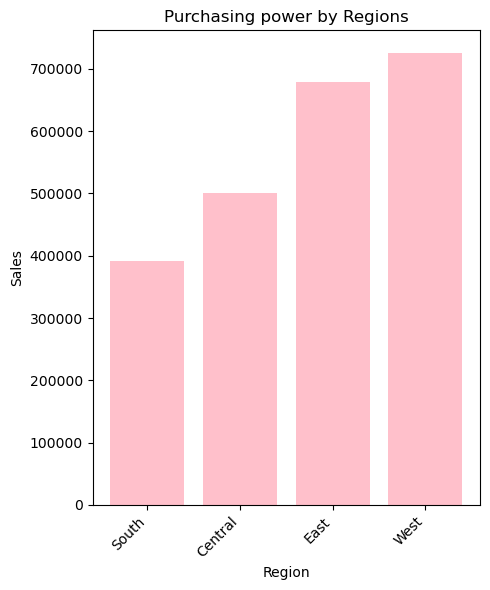

In [9]:
#plotting Sales against Regions 
plt.figure(figsize = (5,6))
plt.bar(results['Region'], results['Sales'], color = '#FFC0CB')

plt.xlabel('Region')
plt.ylabel('Sales')
plt.title('Purchasing power by Regions')

plt.xticks(rotation = 45, ha = 'right')
plt.tight_layout()
plt.show()

## Profits made from these Regions

In [10]:
regprof = df.groupby('Region')['Profit'].sum().reset_index().sort_values(by='Profit', ascending = True)

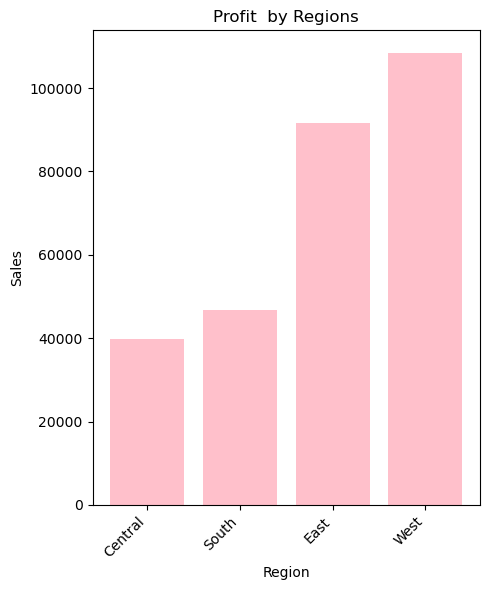

In [21]:
#plotting profits made from Regions 
plt.figure(figsize = (5,6))
plt.bar(regprof['Region'], regprof['Profit'], color = '#FFC0CB')

plt.xlabel('Region')
plt.ylabel('Sales')
plt.title('Profit  by Regions')

plt.xticks(rotation = 45, ha = 'right')
plt.tight_layout()
plt.show()

## What is happening in the Southern Part of United state?
<p> Depsite the Southern part of the country having the least purchasing power but still manages to have more profits than the central part. we'll have to look at the threat and potentials in the southern market </p>

### Do we have the least number of customers from the south?

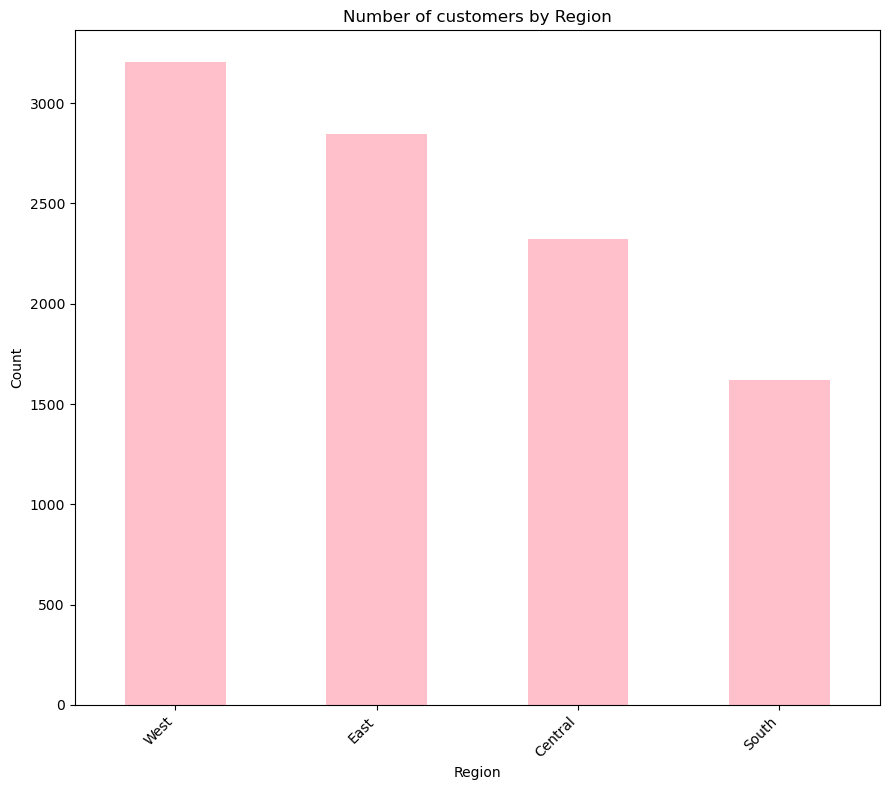

In [12]:
# visualizing with a countplot to show
plt.figure(figsize = (9,8))
df['Region'].value_counts().plot(kind='bar', color = '#FFC0CB')
plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Number of customers by Region')

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

<p> from the visualization we can see that we have least customer from the south with were about 1,600. so we can see this to be one of the reason the southern region have the least minimal sales but more profit than the central region  </p>
<p> the central part of the states have 5% more  customers than the southern part</p>

## which of the citites in the south part contributed more to our profit

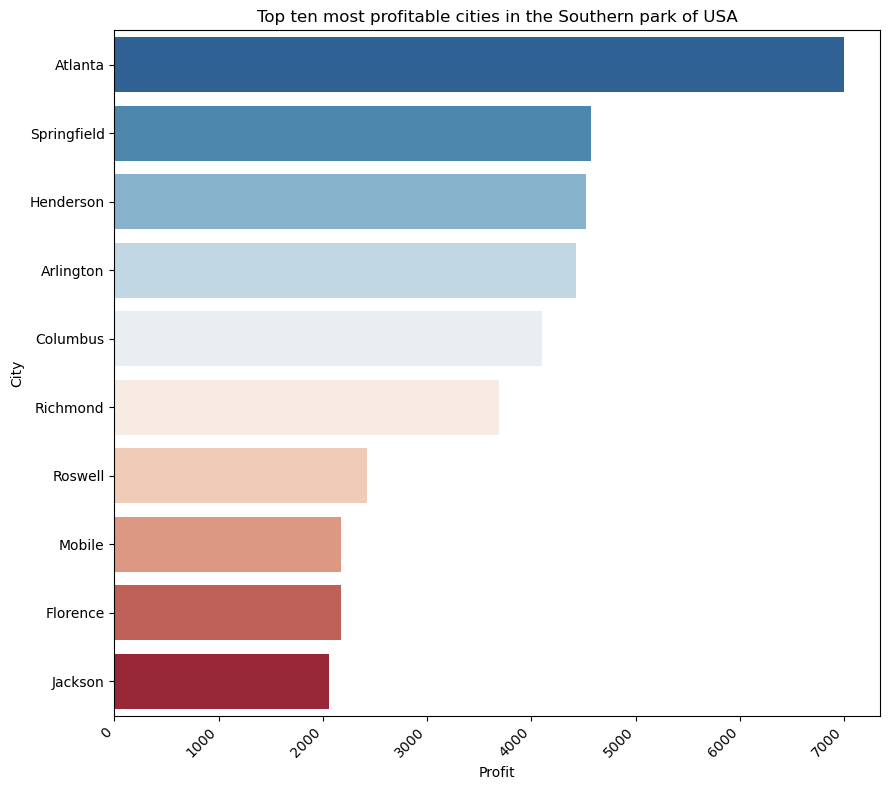

In [13]:
### Profit distribution in the sourthern region.
southern_region = df[df['Region'] == 'South'] #filtering the dataframe to show southern region only

#grouping the data to show first 10
cr = southern_region.groupby('City')['Profit'].sum().reset_index().sort_values(by= 'Profit', ascending = False).head(10)

plt.figure(figsize=(9,8))
sns.barplot(data = cr, y= 'City', x='Profit', palette ='RdBu_r')
plt.xlabel('Profit')
plt.ylabel('City')
plt.title('Top ten most profitable cities in the Southern park of USA')

plt.xticks(rotation = 45, ha = 'right')
plt.tight_layout()
plt.show()

## Top ten cities with the Most Customers

In [14]:
#counting the numbers of customers via cities
no_cust = southern_region['City'].value_counts().sort_values(ascending = False).head(10)

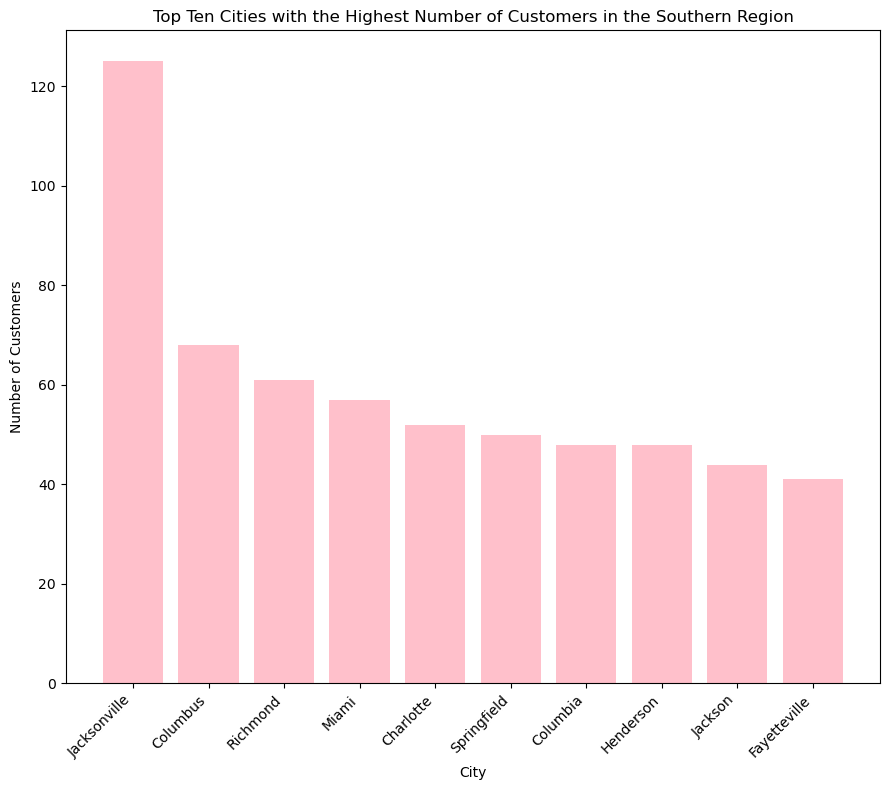

In [15]:
plt.figure(figsize=(9, 8))
plt.bar(no_cust.index, no_cust.values, color='#FFC0CB')
plt.xlabel('City')
plt.ylabel('Number of Customers')
plt.title('Top Ten Cities with the Highest Number of Customers in the Southern Region')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


we can see that we have the large customer base in Jacksonville but they weren't part of the top ten profitable cities in the region. and Atlanta which was the most profitable state didn't make the cut on the top ten highest customers base in the region.
How many total customer do we have then from atlanta?

In [16]:
Atlanta_customers = southern_region['City'][southern_region['City']  == 'Atlanta'].count()
print(f'Number of Customers from Atlanta is {Atlanta_customers}')

Number of Customers from Atlanta is 39


## Why is Atlanta Profitable and not Jacksonville

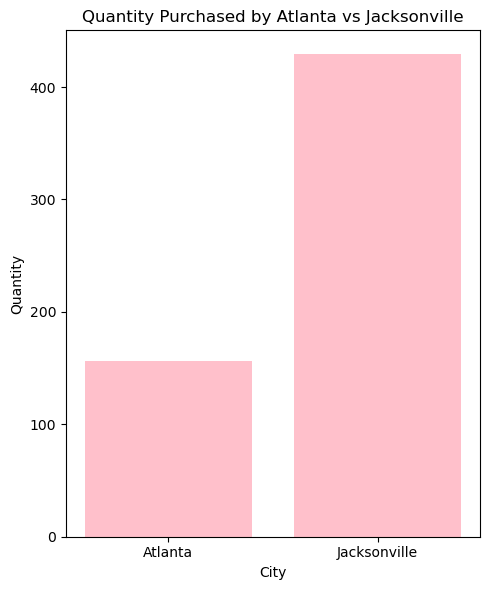

In [17]:
#Quantity purchased by Atlanta Customers compared to Jacksonville
compared_cities = ['Atlanta', 'Jacksonville']
comp_df = southern_region[southern_region['City'].isin(compared_cities)]

cp_df = comp_df.groupby('City')['Quantity'].sum().reset_index()
#visualizing the Quantities both by the two cities
plt.figure(figsize= (5,6))
plt.bar(cp_df['City'], cp_df['Quantity'], color = '#FFC0CB')
plt.xlabel('City')
plt.ylabel('Quantity')
plt.title('Quantity Purchased by Atlanta vs Jacksonville')
plt.tight_layout()

plt.show()

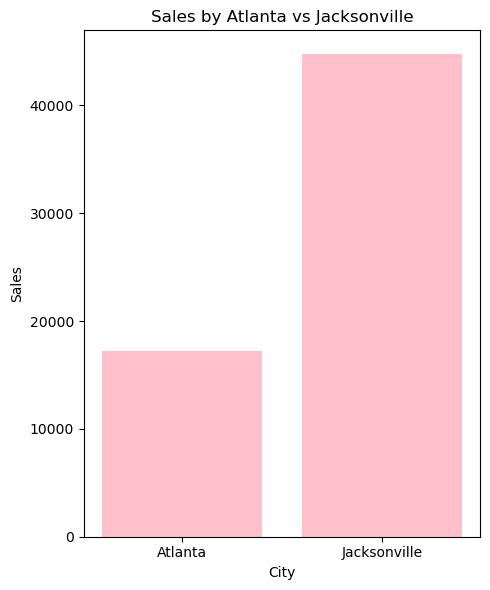

In [18]:
cp_df = comp_df.groupby('City')['Sales'].sum().reset_index()
#visualizing the Sales  by the two cities
plt.figure(figsize= (5,6))
plt.bar(cp_df['City'], cp_df['Sales'], color = '#FFC0CB')
plt.xlabel('City')
plt.ylabel('Sales')
plt.title('Sales by Atlanta vs Jacksonville')
plt.tight_layout()

plt.show()

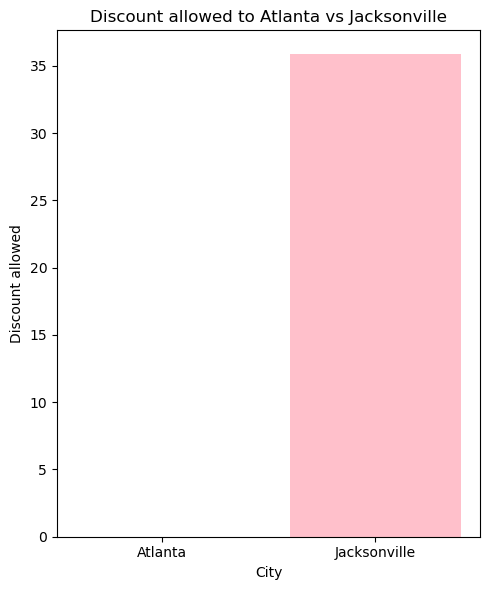

In [19]:
cp_df = comp_df.groupby('City')['Discount'].sum().reset_index()
#visualizing the  city  we gave more discounts
plt.figure(figsize= (5,6))
plt.bar(cp_df['City'], cp_df['Discount'], color = '#FFC0CB')
plt.xlabel('City')
plt.ylabel('Discount allowed')
plt.title('Discount allowed to Atlanta vs Jacksonville')
plt.tight_layout()

plt.show()

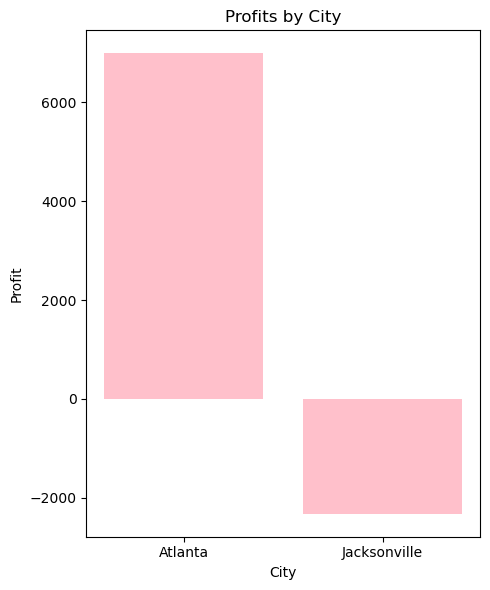

In [20]:
cp_df = comp_df.groupby('City')['Profit'].sum().reset_index()
#visualizing the  city  we gave more discounts
plt.figure(figsize= (5,6))
plt.bar(cp_df['City'], cp_df['Profit'], color = '#FFC0CB')
plt.xlabel('City')
plt.ylabel('Profit')
plt.title('Profits by City')
plt.tight_layout()

plt.show()

## Suggestions for the company
from the above analysis it has been shown that jacksonville cities gives the business a loss despite the numbers of customer, High sales and Quality purchased.
#### Advices to the branch manager at  Jacksonville city on how to make profit 
<p> Reduce the discount given to the customers </p>
<p> Reduce Operating cost </p>
<p> conduct more thorough market research and competitor analysis </p>

